<a href="https://colab.research.google.com/github/Eesha0412/Plant-Disease-Detection/blob/main/TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/PlantVillage.zip

Streaming output truncated to the last 5000 lines.
  inflating: PlantVillage/val/Soybean___healthy/55ed6b1f-9baf-45d9-b4b4-4f19c7dc271a___RS_HL 7312.JPG  
  inflating: PlantVillage/val/Soybean___healthy/561d3eaf-4ff0-4580-9958-55494bf3a88b___RS_HL 6420.JPG  
  inflating: PlantVillage/val/Soybean___healthy/56486310-1cd5-4fb4-9fb8-01f60417f64f___RS_HL 6258.JPG  
  inflating: PlantVillage/val/Soybean___healthy/56a8722c-1acf-4f63-ba8c-66df35f47791___RS_HL 6311.JPG  
  inflating: PlantVillage/val/Soybean___healthy/5735f9f8-b5a4-42b4-b093-1e323323dfa2___RS_HL 3224.JPG  
  inflating: PlantVillage/val/Soybean___healthy/5755b898-21db-4c7f-8d5a-3401e8478192___RS_HL 4530.JPG  
  inflating: PlantVillage/val/Soybean___healthy/578f7dd6-55ae-4fb3-8f79-3ee460250ea7___RS_HL 2784.JPG  
  inflating: PlantVillage/val/Soybean___healthy/57afa416-2cfd-49d0-9674-e59b7955648c___RS_HL 3367.JPG  
  inflating: PlantVillage/val/Soybean___healthy/57bac195-757a-4570-91fd-0da80dedc800___RS_HL 6641.JPG  
  inflating: 

In [ ]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
import os
os.listdir("/content/PlantVillage/train")

['Tomato___Septoria_leaf_spot',
 'Apple___Cedar_apple_rust',
 'background',
 'Apple___Apple_scab',
 'Cherry_(including_sour)___Powdery_mildew',
 'Tomato___Tomato_mosaic_virus',
 'Potato___healthy',
 'Tomato___Leaf_Mold',
 'Strawberry___Leaf_scorch',
 'Pepper,_bell___healthy',
 'Raspberry___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Soybean___healthy',
 'Tomato___Late_blight',
 'Tomato___Early_blight',
 'Corn_(maize)___healthy',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Grape___Black_rot',
 'Pepper,_bell___Bacterial_spot',
 'Potato___Late_blight',
 'Cherry_(including_sour)___healthy',
 'Apple___Black_rot',
 'Strawberry___healthy',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Corn_(maize)___Common_rust_',
 'Blueberry___healthy',
 'Tomato___Target_Spot',
 'Grape___Esca_(Black_Measles)',
 'Tomato___Bacteria

In [ ]:
EPOCHS = 5
INIT_LR = 1e-3
BS = 32
DEFAULT_IMAGE_SIZE= tuple((128,128))
image_size = 0
directory_root = '/content/PlantVillage'
width=128
height=128
depth=3

In [ ]:
train_dir = os.path.join(directory_root, 'train')
val_dir = os.path.join(directory_root, 'val')

In [ ]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, DEFAULT_IMAGE_SIZE)   
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
image_list, label_list = [], []

try:
    print("[INFO] Loading images ...")
    plant_disease_folder_list = listdir(train_dir)

    for plant_disease_folder in plant_disease_folder_list:
        print(f"[INFO] Processing {plant_disease_folder} ...")
        plant_disease_image_list = listdir(f"{train_dir}/{plant_disease_folder}/")

        for image in plant_disease_image_list[:100]:
            image_directory = f"{train_dir}/{plant_disease_folder}/{image}"
            if image_directory.endswith(".jpg")==True or image_directory.endswith(".JPG")==True:
                image_list.append(convert_image_to_array(image_directory))
                label_list.append(plant_disease_folder)

    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

#CONVERTING LABEL LIST INTO LABEL ARRAY
label_array=np.array(label_list)

# Transform the loaded training image data into numpy array
np_image_list = np.array(image_list, dtype=np.float16) / 225.0
print()

# Check the number of images loaded for training
image_len = len(image_list)
print(f"Total number of images: {image_len}")

[INFO] Loading images ...
[INFO] Processing Tomato___Septoria_leaf_spot ...
[INFO] Processing Apple___Cedar_apple_rust ...
[INFO] Processing background ...
[INFO] Processing Apple___Apple_scab ...
[INFO] Processing Cherry_(including_sour)___Powdery_mildew ...
[INFO] Processing Tomato___Tomato_mosaic_virus ...
[INFO] Processing Potato___healthy ...
[INFO] Processing Tomato___Leaf_Mold ...
[INFO] Processing Strawberry___Leaf_scorch ...
[INFO] Processing Pepper,_bell___healthy ...
[INFO] Processing Raspberry___healthy ...
[INFO] Processing Orange___Haunglongbing_(Citrus_greening) ...
[INFO] Processing Grape___Leaf_blight_(Isariopsis_Leaf_Spot) ...
[INFO] Processing Grape___healthy ...
[INFO] Processing Soybean___healthy ...
[INFO] Processing Tomato___Late_blight ...
[INFO] Processing Tomato___Early_blight ...
[INFO] Processing Corn_(maize)___healthy ...
[INFO] Processing Tomato___Tomato_Yellow_Leaf_Curl_Virus ...
[INFO] Processing Corn_(maize)___Northern_Leaf_Blight ...
[INFO] Processing 

In [ ]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)
print(label_binarizer.classes_)

['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Blueberry___healthy'
 'Cherry_(including_sour)___Powdery_mildew'
 'Cherry_(including_sour)___healthy'
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
 'Corn_(maize)___Common_rust_' 'Corn_(maize)___Northern_Leaf_Blight'
 'Corn_(maize)___healthy' 'Grape___Black_rot'
 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy'
 'Orange___Haunglongbing_(Citrus_greening)' 'Peach___Bacterial_spot'
 'Peach___healthy' 'Pepper,_bell___Bacterial_spot'
 'Pepper,_bell___healthy' 'Potato___Early_blight' 'Potato___Late_blight'
 'Potato___healthy' 'Raspberry___healthy' 'Soybean___healthy'
 'Squash___Powdery_mildew' 'Strawberry___Leaf_scorch'
 'Strawberry___healthy' 'Tomato___Bacterial_spot' 'Tomato___Early_blight'
 'Tomato___Late_blight' 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Tomato___Target_Spot'
 'Tomato___Tom

In [ ]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 

[INFO] Spliting data to train, test


In [ ]:
x_train.shape

(3120, 128, 128, 3)

In [ ]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [ ]:
model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
# model.add(Conv2D(64, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 activation (Activation)     (None, 128, 128, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 42, 42, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 42, 42, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 64)        1

In [ ]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
# train the network
print("[INFO] training network...")

[INFO] training network...


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=5, verbose=1
    )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/5
97/97 [==============================] - 313s 3s/step - loss: 0.6189 - accuracy: 0.0622 - val_loss: 0.1531 - val_accuracy: 0.0205
Epoch 2/5
97/97 [==============================] - 311s 3s/step - loss: 0.1744 - accuracy: 0.1292 - val_loss: 0.1410 - val_accuracy: 0.0218
Epoch 3/5
97/97 [==============================] - 309s 3s/step - loss: 0.1104 - accuracy: 0.2652 - val_loss: 0.1626 - val_accuracy: 0.0346
Epoch 4/5
97/97 [==============================] - 306s 3s/step - loss: 0.0929 - accuracy: 0.4122 - val_loss: 0.1562 - val_accuracy: 0.0641
Epoch 5/5
97/97 [==============================] - 304s 3s/step - loss: 0.0797 - accuracy: 0.4968 - val_loss: 0.1203 - val_accuracy: 0.1795


In [ ]:
def Res_Plot_Test_Save(name):
    print("[INFO] Plotting model accuracy and Loss")
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    #Train and validation accuracy
    plt.plot(epochs, acc, 'b', label='Training accurarcy')
    plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
    plt.title('Training and Validation accurarcy')
    plt.legend()

    plt.figure()
    #Train and validation loss
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.legend()
    plt.show()
    
    print("[INFO] Calculating model accuracy")
    scores = model.evaluate(x_test, y_test)
    print(f"Test Accuracy: {scores[1]*100}")
    
    #print("[INFO] Saving model")
    #model.save(name)

[INFO] Plotting model accuracy and Loss


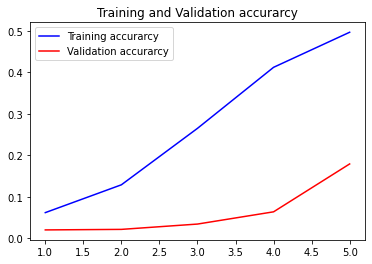

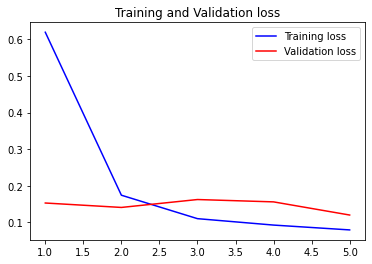

[INFO] Calculating model accuracy
25/25 [==============================] - 17s 667ms/step - loss: 0.1203 - accuracy: 0.1795
Test Accuracy: 17.94871836900711


In [ ]:
Res_Plot_Test_Save('penta_CNN_Algorithm.h5')

In [ ]:
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras.applications.inception_v3 import InceptionV3
from keras.utils.np_utils import to_categorical

# Get the InceptionV3 model so we can do transfer learning
base_inception = InceptionV3(weights='imagenet', include_top=False, 
                             input_shape=(128, 128, 3))
                             
# Add a global spatial average pooling layer
out = base_inception.output
out = GlobalAveragePooling2D()(out)
out = Dense(512, activation='relu')(out)
out = Dense(512, activation='relu')(out)
predictions = Dense(n_classes, activation='softmax')(out)
model = Model(inputs=base_inception.input, outputs=predictions)

# only if we want to freeze layers
for layer in base_inception.layers:
    layer.trainable = False
    
# Compile 
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"]) 
model.summary()

87924736/87910968 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 63, 63, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization_5 (BatchNo  (None, 63, 63, 32)  96          ['conv2d_4[0][0]']               
 rmalization)                                                                                     
                             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


                                                                                                  
 batch_normalization_21 (BatchN  (None, 13, 13, 96)  288         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_19 (Activation)     (None, 13, 13, 48)   0           ['batch_normalization_18[0][0]'] 
                                                                                                  
 activation_22 (Activation)     (None, 13, 13, 96)   0           ['batch_normalization_21[0][0]'] 
                                                                                                  
 average_pooling2d_1 (AveragePo  (None, 13, 13, 256)  0          ['mixed0[0][0]']                 
 oling2D)                                                                                         
          

In [ ]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=10, verbose=1
    )

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


97/97 [==============================] - 125s 1s/step - loss: 0.1097 - accuracy: 0.3099 - val_loss: 0.0665 - val_accuracy: 0.5090
Epoch 2/10
97/97 [==============================] - 116s 1s/step - loss: 0.0590 - accuracy: 0.5829 - val_loss: 0.0561 - val_accuracy: 0.6077
Epoch 3/10
97/97 [==============================] - 118s 1s/step - loss: 0.0483 - accuracy: 0.6606 - val_loss: 0.0453 - val_accuracy: 0.6782
Epoch 4/10
97/97 [==============================] - 134s 1s/step - loss: 0.0440 - accuracy: 0.7011 - val_loss: 0.0430 - val_accuracy: 0.7013
Epoch 5/10
97/97 [==============================] - 117s 1s/step - loss: 0.0390 - accuracy: 0.7380 - val_loss: 0.0416 - val_accuracy: 0.7038
Epoch 6/10
97/97 [==============================] - 118s 1s/step - loss: 0.0378 - accuracy: 0.7429 - val_loss: 0.0390 - val_accuracy: 0.7167
Epoch 7/10
97/97 [==============================] - 119s 1s/step - loss: 0.0346 - accuracy: 0.7691 - val_loss: 0.0391 - val_accuracy: 0.7372
Epoch 8/10
97/97 [======

[INFO] Plotting model accuracy and Loss


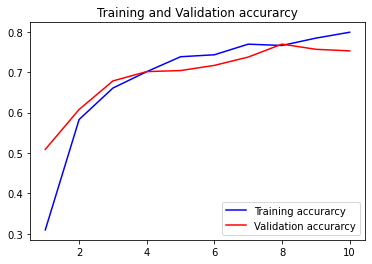

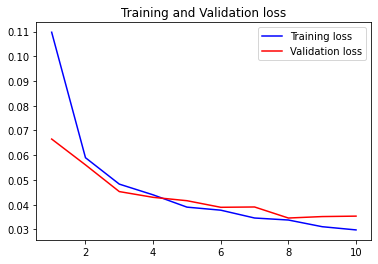

[INFO] Calculating model accuracy
25/25 [==============================] - 22s 876ms/step - loss: 0.0354 - accuracy: 0.7526
Test Accuracy: 75.25641322135925


In [ ]:
Res_Plot_Test_Save('Inception_ModelV3_(Imagenet_Weights).h5')

In [ ]:
from sklearn.metrics import classification_report
y_pred=model.predict(x_test)
y_pred=y_pred>0.5
y_pred = y_pred.astype(int)
report=classification_report(y_test, y_pred,output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.16      0.27        19
           1       0.79      0.85      0.82        27
           2       0.81      0.91      0.86        23
           3       0.75      0.60      0.67        25
           4       0.86      0.75      0.80        16
           5       0.86      0.89      0.87        27
           6       0.86      0.95      0.90        19
           7       0.58      0.41      0.48        17
           8       1.00      0.85      0.92        20
           9       0.77      0.74      0.76        23
          10       0.93      0.93      0.93        14
          11       0.82      1.00      0.90        14
          12       0.90      0.50      0.64        18
          13       1.00      0.86      0.93        22
          14       0.79      0.94      0.86        16
          15       0.91      1.00      0.95        21
          16       1.00      0.88      0.94        17
          17       0.95    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from keras.models import Model
from keras import applications
from tensorflow.keras.optimizers import Adam

from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras.applications.inception_v3 import InceptionV3
from keras.utils.np_utils import to_categorical

# Get the Resnet model so we can do transfer learning
# base_model = applications.resnet50.ResNet50(weights= None, include_top=False, input_shape= (128,128,3))
# from tensorflow.keras.applications.resnet50 import ResNet50

# base_model=applications.resnet50.ResNet50(weights= None, include_top=False, input_shape= (128,128,3))
from keras.applications.resnet import ResNet50

# Get the Resnet model so we can do transfer learning
base_model = ResNet50(weights= None, include_top=False, input_shape= (128,128,3))
                             
                             
# Add a global spatial average pooling layer
out = base_model.output
out = GlobalAveragePooling2D()(out)
out = Dense(512, activation='relu')(out)
out = Dense(512, activation='relu')(out)
predictions = Dense(n_classes, activation='softmax')(out)
model = Model(inputs=base_model.input, outputs=predictions)

# only if we want to freeze layers
for layer in base_inception.layers:
    layer.trainable = False
    
# Compile 
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"]) 
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']       

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 conv3_block1_2_bn (BatchNormal  (None, 16, 16, 128)  512        ['conv3_block1_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block1_2_relu (Activatio  (None, 16, 16, 128)  0          ['conv3_block1_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block1_0_conv (Conv2D)   (None, 16, 16, 512)  131584      ['conv2_block3_out[0][0]']       
                                                                                                  
 conv3_block1_3_conv (Conv2D)   (None, 16, 16, 512)  66048       ['conv3_block1_2_relu[0][0]']    
                                                                                                  
 conv3_blo

In [ ]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=10, verbose=1
    )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
97/97 [==============================] - 867s 9s/step - loss: 0.1419 - accuracy: 0.0567 - val_loss: 0.1607 - val_accuracy: 0.0282
Epoch 2/10
97/97 [==============================] - 856s 9s/step - loss: 0.0995 - accuracy: 0.1840 - val_loss: 0.1774 - val_accuracy: 0.0179
Epoch 3/10
97/97 [==============================] - 856s 9s/step - loss: 0.0846 - accuracy: 0.3000 - val_loss: 0.2177 - val_accuracy: 0.0308
Epoch 4/10
97/97 [==============================] - 853s 9s/step - loss: 0.0729 - accuracy: 0.4156 - val_loss: 0.1856 - val_accuracy: 0.0654
Epoch 5/10
97/97 [==============================] - 845s 9s/step - loss: 0.0651 - accuracy: 0.4755 - val_loss: 0.0994 - val_accuracy: 0.3179
Epoch 6/10
97/97 [==============================] - 853s 9s/step - loss: 0.0584 - accuracy: 0.5374 - val_loss: 0.8583 - val_accuracy: 0.1449
Epoch 7/10
97/97 [==============================] - 856s 9s/step - loss: 0.0545 - accuracy: 0.5701 - val_loss: 0.1483 - val_accuracy: 0.3923
Epoch 8/10
97

[INFO] Plotting model accuracy and Loss


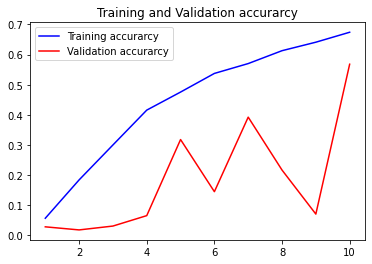

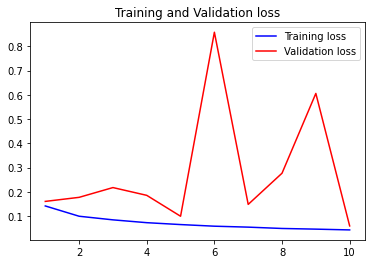

[INFO] Calculating model accuracy
25/25 [==============================] - 39s 2s/step - loss: 0.0595 - accuracy: 0.5679
Test Accuracy: 56.794869899749756


In [ ]:
Res_Plot_Test_Save('Resnet_With_Imagenet_Weingts.h5')

In [ ]:
from sklearn.metrics import classification_report
y_pred=model.predict(x_test)
y_pred=y_pred>0.5
y_pred = y_pred.astype(int)
report=classification_report(y_test, y_pred,output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.64      0.62        22
           1       0.61      0.88      0.72        25
           2       1.00      0.14      0.25        14
           3       1.00      0.38      0.55        21
           4       1.00      0.26      0.41        23
           5       0.54      0.70      0.61        10
           6       0.86      0.92      0.89        13
           7       0.34      0.92      0.50        12
           8       0.88      1.00      0.94        23
           9       1.00      0.27      0.43        22
          10       1.00      0.25      0.40        20
          11       0.43      0.18      0.25        17
          12       0.63      0.57      0.60        21
          13       0.67      0.56      0.61        18
          14       1.00      0.42      0.59        19
          15       0.73      0.86      0.79        22
          16       1.00      0.33      0.50        15
          17       0.93    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from keras.models import Model
from keras.applications import vgg16
from tensorflow.keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras.applications.inception_v3 import InceptionV3
from keras.utils.np_utils import to_categorical

# Get the Resnet model so we can do transfer learning
vgg = vgg16.VGG16(weights= None, include_top=False, input_shape= (128,128,3))
                             
# Add a global spatial average pooling layer
out = base_model.output
out = GlobalAveragePooling2D()(out)
out = Dense(512, activation='relu')(out)
out = Dense(512, activation='relu')(out)
predictions = Dense(n_classes, activation='softmax')(out)
model = Model(inputs=base_model.input, outputs=predictions)

# only if we want to freeze layers
for layer in base_inception.layers:
    layer.trainable = False
    
# Compile 
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"]) 
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']       

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 ization)                                                                                         
                                                                                                  
 conv3_block2_add (Add)         (None, 16, 16, 512)  0           ['conv3_block1_out[0][0]',       
                                                                  'conv3_block2_3_bn[0][0]']      
                                                                                                  
 conv3_block2_out (Activation)  (None, 16, 16, 512)  0           ['conv3_block2_add[0][0]']       
                                                                                                  
 conv3_block3_1_conv (Conv2D)   (None, 16, 16, 128)  65664       ['conv3_block2_out[0][0]']       
                                                                                                  
 conv3_block3_1_bn (BatchNormal  (None, 16, 16, 128)  512        ['conv3_block3_1_conv[0][0]']    
 ization) 

In [ ]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=10, verbose=1
    )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
97/97 [==============================] - 865s 9s/step - loss: 0.0953 - accuracy: 0.3541 - val_loss: 14.6397 - val_accuracy: 0.0231
Epoch 2/10
97/97 [==============================] - 850s 9s/step - loss: 0.0600 - accuracy: 0.5371 - val_loss: 6.7396 - val_accuracy: 0.0526
Epoch 3/10
97/97 [==============================] - 847s 9s/step - loss: 0.0519 - accuracy: 0.6077 - val_loss: 0.1936 - val_accuracy: 0.1679
Epoch 4/10
97/97 [==============================] - 846s 9s/step - loss: 0.0457 - accuracy: 0.6501 - val_loss: 0.6551 - val_accuracy: 0.2385
Epoch 5/10
97/97 [==============================] - 849s 9s/step - loss: 0.0397 - accuracy: 0.7049 - val_loss: 0.2225 - val_accuracy: 0.2808
Epoch 6/10
97/97 [==============================] - 854s 9s/step - loss: 0.0396 - accuracy: 0.7068 - val_loss: 0.2862 - val_accuracy: 0.3590
Epoch 7/10
97/97 [==============================] - 849s 9s/step - loss: 0.0377 - accuracy: 0.7276 - val_loss: 0.1115 - val_accuracy: 0.4308
Epoch 8/10
9

[INFO] Plotting model accuracy and Loss


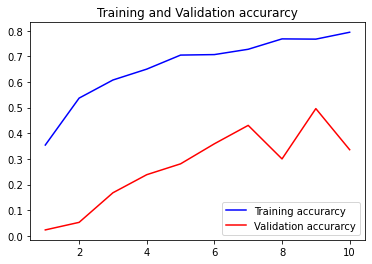

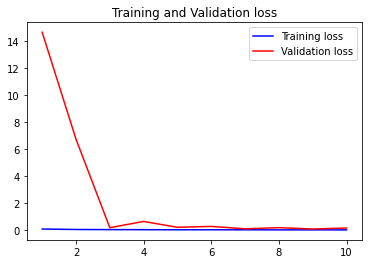

[INFO] Calculating model accuracy
25/25 [==============================] - 59s 2s/step - loss: 0.1656 - accuracy: 0.3359
Test Accuracy: 33.589744567871094
[INFO] Plotting model accuracy and Loss


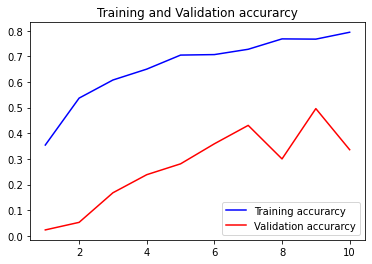

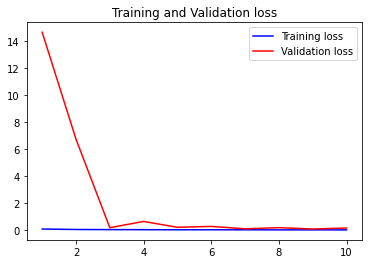

[INFO] Calculating model accuracy
25/25 [==============================] - 43s 2s/step - loss: 0.1656 - accuracy: 0.3359
Test Accuracy: 33.589744567871094


In [ ]:
Res_Plot_Test_Save('VGG16_With_Imagenet_Weingts.h5')

In [ ]:
from sklearn.metrics import classification_report
y_pred=model.predict(x_test)
y_pred=y_pred>0.5
y_pred = y_pred.astype(int)
report=classification_report(y_test, y_pred,output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.15      0.82      0.25        22
           1       0.24      0.84      0.38        25
           2       0.33      0.07      0.12        14
           3       1.00      0.10      0.17        21
           4       0.07      0.09      0.08        23
           5       0.25      0.30      0.27        10
           6       1.00      0.08      0.14        13
           7       1.00      0.25      0.40        12
           8       1.00      1.00      1.00        23
           9       0.73      1.00      0.85        22
          10       0.90      0.45      0.60        20
          11       0.31      0.29      0.30        17
          12       0.00      0.00      0.00        21
          13       0.00      0.00      0.00        18
          14       0.00      0.00      0.00        19
          15       0.70      0.64      0.67        22
          16       1.00      0.27      0.42        15
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           0       0.15      0.82      0.25        22
           1       0.24      0.84      0.38        25
           2       0.33      0.07      0.12        14
           3       1.00      0.10      0.17        21
           4       0.07      0.09      0.08        23
           5       0.25      0.30      0.27        10
           6       1.00      0.08      0.14        13
           7       1.00      0.25      0.40        12
           8       1.00      1.00      1.00        23
           9       0.73      1.00      0.85        22
          10       0.90      0.45      0.60        20
          11       0.31      0.29      0.30        17
          12       0.00      0.00      0.00        21
          13       0.00      0.00      0.00        18
          14       0.00      0.00      0.00        19
          15       0.70      0.64      0.67        22
          16       1.00      0.27      0.42        15
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat